## Worksheet 03
***

### Data Preparation

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import (train_test_split, cross_val_score, KFold)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import numpy as np

from data_preparation import (data_filtering, reduce_dimension, worse_reduce_dimension)
from viz import (scatter_plot_data, plot_data_nm_classifier, plot_data)
from utils import (euclidean_norm, calculate_error, kf_cross_validation)

from nearest_mean_classifier import nearest_mean_classifier
from lda import LinearDiscriminantAnalysis
from qda import QuadraticDiscriminantAnalysis

%load_ext autoreload
%autoreload 2

In [2]:
# Load data
digits = load_digits()

# Filtering and split data 
X_train, X_test, y_train, y_test = data_filtering(digits, seed=12345, test_percentage=0.33, filter=[1, 7])

### Dimension reduction

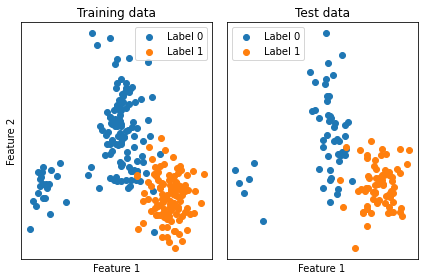

In [3]:
Xr_train, Xr_test = reduce_dimension(X_train), reduce_dimension(X_test)

feat_min, feat_max = np.min(Xr_test, axis=0), np.max(Xr_test, axis=0)

# # Plot data
scatter_plot_data(Xr_train, Xr_test, y_train, y_test)

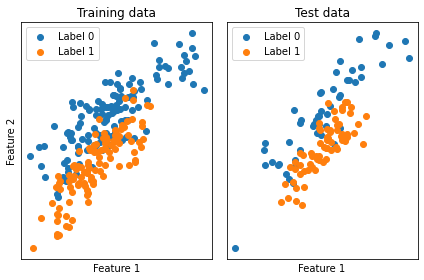

In [4]:
_Xr_train, _Xr_test = worse_reduce_dimension(X_train), worse_reduce_dimension(X_test) 

# Scatter Plot
scatter_plot_data(_Xr_train, _Xr_test, y_train, y_test)

### Nearest Mean Classifier

In [5]:
# Make predictions
predictions, means = nearest_mean_classifier(Xr_train, Xr_test, y_train)

In [6]:
# Calculate out-of-sample error
ose = nearest_mean_classifier(Xr_train, Xr_test, y_train, error=True, y_test=y_test)

print("Out-of-sample error {0:2.2f}%".format(ose))

Out-of-sample error 0.97%


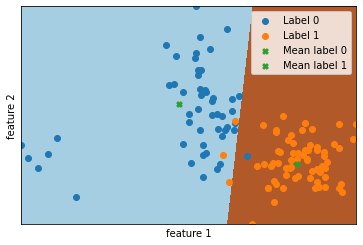

In [7]:
plot_data_nm_classifier(Xr_train, Xr_test, y_train, y_test)

### Quadratic Discriminant Analysis

In [8]:
# Fit QDA
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(Xr_train, y_train)

# Predict
y_pred = qda.predict(Xr_test)

# Print out-of-sample error
ose = calculate_error(y_pred, y_test)

print("Out-of-sample error {0:2.2f}%".format(ose))

Out-of-sample error 0.97%


### Linear Discriminant Analysis

In [9]:
lda = LinearDiscriminantAnalysis(store_covariance=True)

lda.fit(Xr_train, y_train)

y_pred = lda.predict(Xr_test)

# Print out-of-sample error
ose = calculate_error(y_pred, y_test)

print("Out-of-sample error with lsqr solver: {0:2.2f}%".format(ose))

Out-of-sample error with lsqr solver: 0.96%


### Visualization

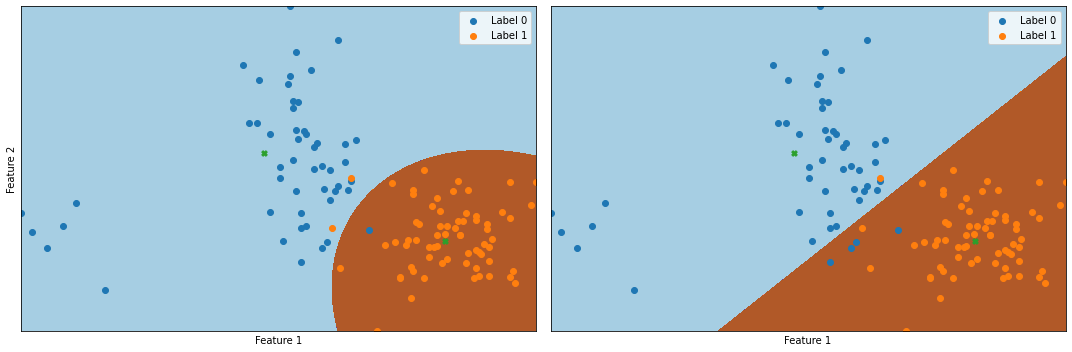

In [10]:
models = [qda, lda]
plot_data(models, Xr_test, y_test, ellipse=False)  # ToDo: Make plot ellipse

### Performance evaluation

In [11]:
digits = load_digits()
data, target = data_filtering(digits, filter=[1, 7], split=False)

In [12]:
models = [qda, lda]
for i in range(len(models)):
    kf_cross_validation(data, target, models[i], n_splits=100)

Model <qda.QuadraticDiscriminantAnalysis object at 0x7f8cb735c130>. Mean Accuracy Cross Validation: 0.97 +/- 0.10
Model <lda.LinearDiscriminantAnalysis object at 0x7f8cb7318bb0>. Mean Accuracy Cross Validation: 0.96 +/- 0.10
